In [2]:
# Data Analysis and wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
rawdata = pd.read_csv('ChurnDataset.csv')

In [5]:
rawdata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
rawdata.shape

(7043, 21)

In [9]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [89]:
print(rawdata[rawdata['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753    

In [40]:
rawdata['TotalCharges'] = rawdata['TotalCharges'].convert_objects(convert_numeric=True)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [85]:
rawdata['TotalCharges']  = pd.to_numeric(rawdata['TotalCharges'], errors='coerce')

In [90]:
rawdata = rawdata.dropna(subset=['TotalCharges'])

In [92]:
rawdata.shape

(7032, 23)

In [41]:
rawdata.describe(percentiles = [.1,.25,.50,.75,.90,.95,.99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
10%,0.000000,2.000000,20.050000,84.600000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
90%,1.000000,69.000000,102.600000,5976.640000
95%,1.000000,72.000000,107.400000,6923.590000


In [11]:
rawdata.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1986-PHGZF,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
rawdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Doing a value count for each feature. Note the observation in Excel. 

In [42]:
rawdata['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

### Percentage of ppl churn out analysis with seaborn.

In [43]:
def Churn_Val_Conv(data):
    if data == 'No':
        return 0
    else:
        return 1

rawdata['Churn'] = rawdata['Churn'].apply(Churn_Val_Conv)

In [47]:
rawdata[['gender', 'Churn']].groupby(['gender'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,gender,Churn
0,Female,0.269209
1,Male,0.261603


In [49]:
rawdata[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,SeniorCitizen,Churn
1,1,0.416813
0,0,0.236062


In [50]:
rawdata[['Partner', 'Churn']].groupby(['Partner'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Partner,Churn
0,No,0.329580
1,Yes,0.196649


In [52]:
rawdata[['Dependents', 'Churn']].groupby(['Dependents'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Dependents,Churn
0,No,0.312791
1,Yes,0.154502


In [53]:
rawdata[['PhoneService', 'Churn']].groupby(['PhoneService'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PhoneService,Churn
1,Yes,0.267096
0,No,0.249267


In [54]:
rawdata[['MultipleLines', 'Churn']].groupby(['MultipleLines'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,MultipleLines,Churn
2,Yes,0.286099
0,No,0.250442
1,No phone service,0.249267


In [55]:
rawdata[['InternetService', 'Churn']].groupby(['InternetService'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,InternetService,Churn
1,Fiber optic,0.418928
0,DSL,0.189591
2,No,0.074050


### Need to improve on Fiber Optic to retain customer

In [56]:
rawdata[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,OnlineSecurity,Churn
0,No,0.417667
2,Yes,0.146112
1,No internet service,0.074050


In [57]:
rawdata[['OnlineBackup', 'Churn']].groupby(['OnlineBackup'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,OnlineBackup,Churn
0,No,0.399288
2,Yes,0.215315
1,No internet service,0.074050


In [58]:
rawdata[['DeviceProtection', 'Churn']].groupby(['DeviceProtection'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,DeviceProtection,Churn
0,No,0.391276
2,Yes,0.225021
1,No internet service,0.074050


In [59]:
rawdata[['TechSupport', 'Churn']].groupby(['TechSupport'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,TechSupport,Churn
0,No,0.416355
2,Yes,0.151663
1,No internet service,0.074050


In [60]:
rawdata[['StreamingTV', 'Churn']].groupby(['StreamingTV'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,StreamingTV,Churn
0,No,0.335231
2,Yes,0.300702
1,No internet service,0.074050


In [61]:
rawdata[['StreamingMovies', 'Churn']].groupby(['StreamingMovies'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,StreamingMovies,Churn
0,No,0.336804
2,Yes,0.299414
1,No internet service,0.074050


In [62]:
rawdata[['Contract', 'Churn']].groupby(['Contract'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Contract,Churn
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


In [63]:
rawdata[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PaperlessBilling,Churn
1,Yes,0.335651
0,No,0.163301


In [64]:
rawdata[['PaymentMethod', 'Churn']].groupby(['PaymentMethod'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PaymentMethod,Churn
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


In [93]:
rawdata_churn = rawdata[rawdata['Churn'] == 1]
rawdata_no_churn = rawdata[rawdata['Churn'] == 0]

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


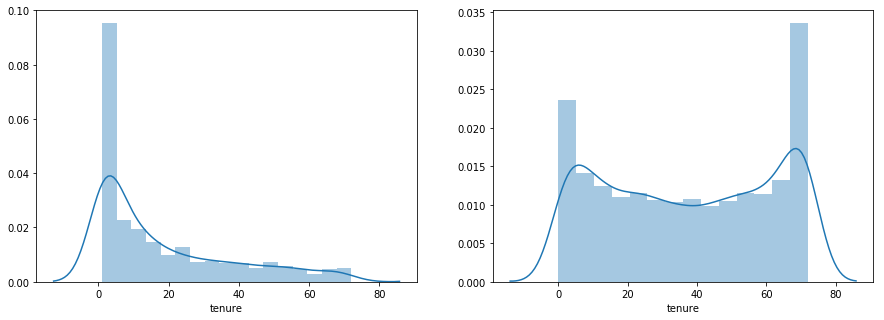

In [73]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(rawdata_churn['tenure'], ax = ax1)
sns.distplot(rawdata_no_churn['tenure'], ax = ax2)

In [74]:
def tenure_conv(data):
    if data < 15:
        return '0_15 Months'
    elif data < 40:
        return '16_40 Months'
    else:
        return 'gt 40'

rawdata['tenureNew'] = rawdata['tenure'].apply(tenure_conv)

In [75]:
rawdata[['tenureNew', 'Churn']].groupby(['tenureNew'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,tenureNew,Churn
0,0_15 Months,0.463518
1,16_40 Months,0.245273
2,gt 40,0.112017


C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


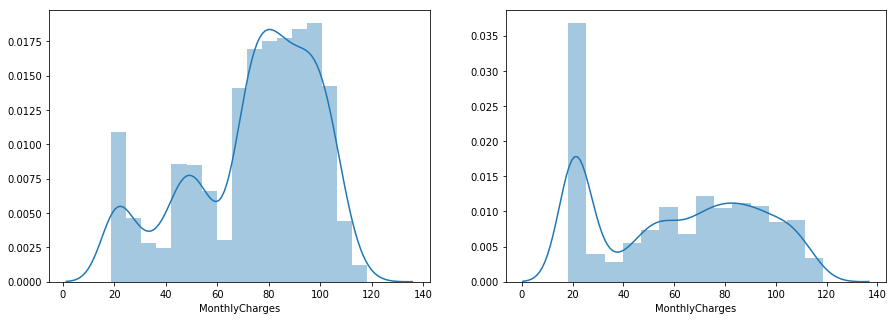

In [76]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(rawdata_churn['MonthlyCharges'], ax = ax1)
sns.distplot(rawdata_no_churn['MonthlyCharges'], ax = ax2)

In [77]:
def monthly_charge_conv(data):
    if data <= 40:
        return '0_40 dollar per months'
    elif data <= 60:
        return '40_60 dollar per months'
    else:
        return 'gt 60'

rawdata['MonthlyChargesNew'] = rawdata['MonthlyCharges'].apply(monthly_charge_conv)

In [78]:
rawdata[['MonthlyChargesNew', 'Churn']].groupby(['MonthlyChargesNew'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,MonthlyChargesNew,Churn
2,gt 60,0.334303
1,40_60 dollar per months,0.255556
0,0_40 dollar per months,0.116431


C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


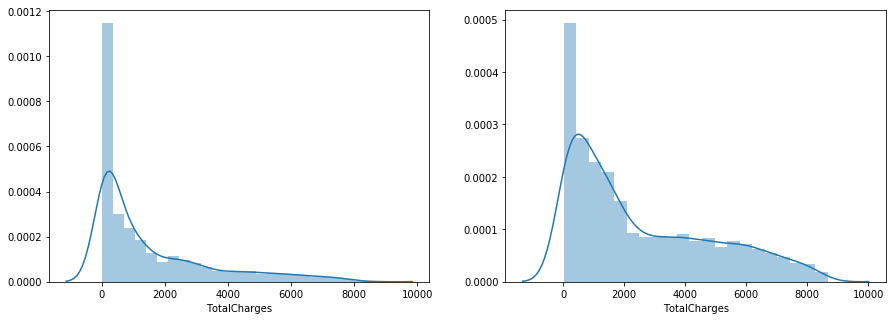

In [94]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(rawdata_churn['TotalCharges'], ax = ax1)
sns.distplot(rawdata_no_churn['TotalCharges'], ax = ax2)

In [95]:
def TotalCharges_conv(data):
    if data <= 2000:
        return '0_2000 dollar'
    elif data <= 4000:
        return '2000_4000 dollar'
    else:
        return 'gt 4000'

rawdata['TotalChargesNew'] = rawdata['TotalCharges'].apply(TotalCharges_conv)

In [96]:
rawdata[['TotalChargesNew', 'Churn']].groupby(['TotalChargesNew'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,TotalChargesNew,Churn
0,0_2000 dollar,0.320642
1,2000_4000 dollar,0.237583
2,gt 4000,0.147451


#### Multivariate Analysis

In [103]:
gender_pivot_data = rawdata[['gender','PaymentMethod', 'Churn']].groupby(['gender','PaymentMethod'], as_index=False).mean().sort_values(by='Churn', ascending=False)

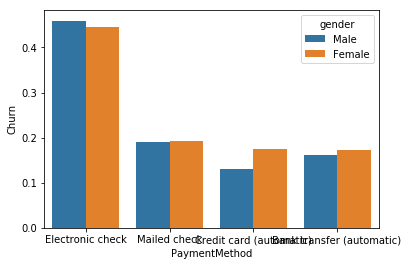

In [104]:
sns.barplot(x = 'PaymentMethod', y = 'Churn', hue = 'gender', data = gender_pivot_data)

In [119]:
rawdata['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

#### Creating a new feature for Partner and Dependant

In [121]:
def Partner_Dependents_fun(part_data, dep_data):
    if part_data == 'No' and dep_data == 'No':
        return 0
    else:
        return 1

rawdata['Part_Dep_Var'] = rawdata.apply(lambda x: Partner_Dependents_fun(x['Partner'], x['Dependents']), axis=1)

In [123]:
rawdata[['Part_Dep_Var', 'Churn']].groupby(['Part_Dep_Var'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Part_Dep_Var,Churn
0,0,0.342378
1,1,0.198827


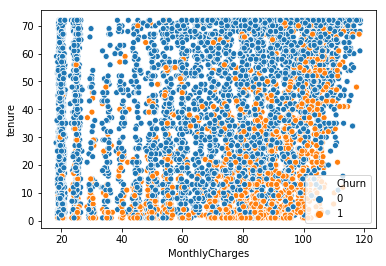

In [124]:
sns.scatterplot(x = 'MonthlyCharges', y='tenure', data = rawdata, hue = 'Churn')

In [130]:
rawdata[['InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'MonthlyCharges']].groupby(['InternetService','OnlineSecurity'], as_index=False).mean().sort_values(by='MonthlyCharges', ascending=False)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges
31,Fiber optic,Yes,Yes,Yes,Yes,110.743455
23,Fiber optic,No,Yes,Yes,Yes,104.363907
27,Fiber optic,Yes,No,Yes,Yes,103.958000
30,Fiber optic,Yes,Yes,Yes,No,102.181967
29,Fiber optic,Yes,Yes,No,Yes,100.187500
22,Fiber optic,No,Yes,Yes,No,97.965385
19,Fiber optic,No,No,Yes,Yes,97.324031
21,Fiber optic,No,Yes,No,Yes,96.501961
26,Fiber optic,Yes,No,Yes,No,96.270690
25,Fiber optic,Yes,No,No,Yes,94.543750


#### Creating a new feature as number of online services opted for

In [131]:
def Number_Of_Services_Opted_fun(online_sec, online_back, device_prot, TechSupport):
    online_sec_cnt, online_back_cnt, device_prot_cnt, TechSupport_cnt = 0,0,0,0
    no_of_services_opted = 0
    if online_sec == 'Yes':
        no_of_services_opted+=1
    if online_back == 'Yes':
        no_of_services_opted+=1
    if device_prot == 'Yes':
        no_of_services_opted+=1
    if TechSupport == 'Yes':
        no_of_services_opted+=1
    
    return no_of_services_opted

rawdata['Number_Of_Services_Opted'] = rawdata.apply(lambda x: Number_Of_Services_Opted_fun(x['OnlineSecurity'], x['OnlineBackup'], x['DeviceProtection'], x['TechSupport']), axis=1)

In [134]:
rawdata[['InternetService', 'Number_Of_Services_Opted', 'MonthlyCharges']].groupby(['InternetService', 'Number_Of_Services_Opted'], as_index=False).mean().sort_values(by='MonthlyCharges', ascending=False)

,InternetService,Number_Of_Services_Opted,MonthlyCharges
9,Fiber optic,4,110.743455
8,Fiber optic,3,102.968149
7,Fiber optic,2,96.694614
6,Fiber optic,1,88.739258
5,Fiber optic,0,79.827948
4,DSL,4,77.423201
3,DSL,3,66.859789
2,DSL,2,58.817823
1,DSL,1,50.760294
0,DSL,0,43.380788


In [137]:
rawdata['InternetService_NoOfService'] = rawdata['InternetService'].map(str)  + rawdata['Number_Of_Services_Opted'].map(str) 

In [138]:
rawdata['InternetService_NoOfService'].unique()

array(['DSL1', 'DSL2', 'DSL3', 'Fiber optic0', 'Fiber optic1',
       'Fiber optic2', 'No0', 'Fiber optic3', 'Fiber optic4', 'DSL4',
       'DSL0'], dtype=object)

In [139]:
rawdata[['InternetService_NoOfService', 'Churn']].groupby(['InternetService_NoOfService'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,InternetService_NoOfService,Churn
5,Fiber optic0,0.635613
6,Fiber optic1,0.467942
0,DSL0,0.427208
7,Fiber optic2,0.324468
1,DSL1,0.266436
8,Fiber optic3,0.197115
2,DSL2,0.132258
9,Fiber optic4,0.083770
10,No0,0.074342
3,DSL3,0.067179


In [146]:
rawdata['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [147]:
def PaymentMethod_fun(PaymentMethodData):
    if PaymentMethodData == 'Electronic check':
        return 1
    else:
        return 0

rawdata['PaymentMethodNew'] = rawdata.apply(lambda x: PaymentMethod_fun(x['PaymentMethod']), axis=1)

## Feature to be Used -
* SeniorCitizen
* Part_Dep_Var (Combination of Partner and Dpendents)
* tenureNew
* InternetService_NoOfService
* Contract
* PaperlessBilling
* PaymentMethodNew
* MonthlyChargesNew

#### Task - Convert all these in Numerical Equivalents

In [157]:
rawdata['PaymentMethodNew'].unique()

array([1, 0], dtype=int64)

In [156]:
def tenureNew_Convert(data):
    if data == '0_15 Months':
        return 0
    elif data == '16_40 Months':
        return 1
    else:
        return 2

def InternetService_NoOfService_Convert(data):
    if data == 'Fiber optic0':
        return 0
    elif data == 'Fiber optic1':
        return 1
    elif data == 'DSL0':
        return 2
    elif data == 'Fiber optic2':
        return 3
    elif data == 'DSL1':
        return 4
    elif data == 'Fiber optic3':
        return 5
    elif data == 'DSL2':
        return 6
    elif data == 'Fiber optic4':
        return 7
    elif data == 'No0':
        return 8
    elif data == 'DSL3':
        return 9
    else:
        return 10
    
def Contract_Convert(data):
    if data == 'Month-to-month':
        return 0
    elif data == 'One year':
        return 1
    else:
        return 2
    
def PaperlessBilling_Convert(data):
    if data == 'Yes':
        return 0
    else:
        return 1

def MonthlyCharges_Convert(data):
    if data == '0_40 dollar per months':
        return 0
    elif data == '40_60 dollar per months':
        return 1
    else:
        return 2


rawdata['tenure_Numerical'] = rawdata['tenureNew'].apply(tenureNew_Convert)
rawdata['InternetService_NoOfService_Numerical'] = rawdata['InternetService_NoOfService'].apply(InternetService_NoOfService_Convert)
rawdata['Contract_Numerical'] = rawdata['Contract'].apply(Contract_Convert)
rawdata['PaperlessBilling_Numerical'] = rawdata['PaperlessBilling'].apply(PaperlessBilling_Convert)
rawdata['MonthlyCharges_Numerical'] = rawdata['MonthlyChargesNew'].apply(MonthlyCharges_Convert)


In [158]:
final_data = rawdata[['SeniorCitizen','Part_Dep_Var' , 'tenure_Numerical' , 'InternetService_NoOfService_Numerical' , 'Contract_Numerical', 'PaperlessBilling_Numerical', 'PaymentMethodNew', 'MonthlyCharges_Numerical' , 'Churn']]

In [159]:
final_data.head()

,SeniorCitizen,Part_Dep_Var,tenure_Numerical,InternetService_NoOfService_Numerical,Contract_Numerical,PaperlessBilling_Numerical,PaymentMethodNew,MonthlyCharges_Numerical,Churn
0,0,1,0,4,0,0,1,0,0
1,0,0,1,6,1,1,0,1,0
2,0,0,0,6,0,0,0,1,1
3,0,0,2,9,1,1,0,1,0
4,0,0,0,0,0,0,1,2,1


In [160]:
final_data.shape

(7032, 9)

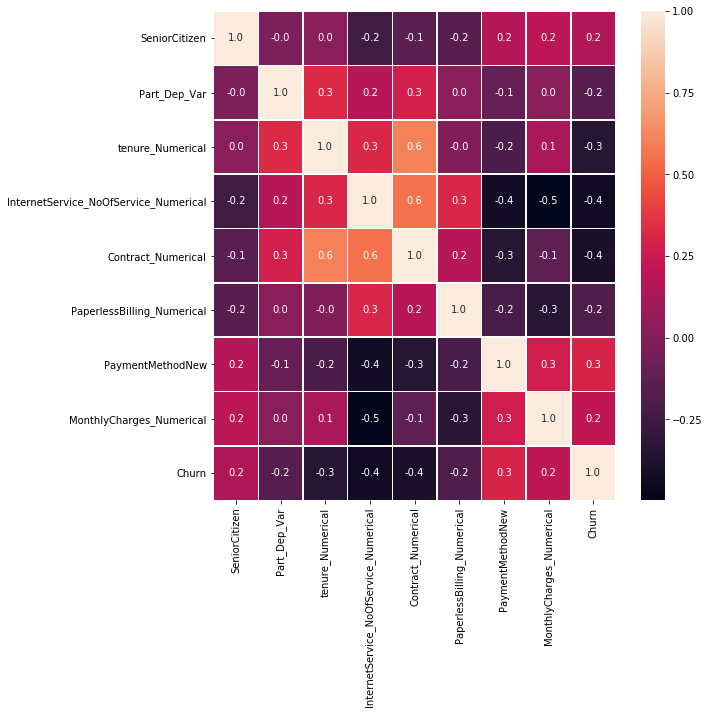

In [162]:
#correlation map
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(final_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Standardization

In [163]:
from sklearn.preprocessing import StandardScaler

In [165]:
# Standardized data
stan_final_dataset_input = final_data.drop(['Churn'], axis=1)

scalar = StandardScaler()
stan_final_dataset_input = scalar.fit_transform(stan_final_dataset_input)

### Train Test Split

In [166]:
from sklearn import model_selection

In [167]:
final_dataset_output = final_data['Churn']

In [168]:
X_1, X_test, y_1, y_test = model_selection.train_test_split(stan_final_dataset_input, final_dataset_output, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)


In [169]:
%%time

print(X_tr.shape)
print(y_tr.shape)
print(X_cv.shape)
print(y_cv.shape)

(3445, 8)
(3445,)
(1477, 8)
(1477,)
Wall time: 0 ns


In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [171]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [173]:
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier

In [174]:
%%time

list1 = []
k_list = []
pre_list = []
rec_list = []
f1_list = []
acc_list = []
auc_list = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    
    prefor = precision_score(y_cv, pred)
    recfor = recall_score(y_cv, pred)
    
    # evaluate CV accuracy
    f1_score_val = f1_score(y_cv, pred) 
    
    list1.append((i,prefor,recfor,f1_score_val))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, pred)
    
    
    k_list.append(i)
    pre_list.append(prefor)
    rec_list.append(recfor)
    f1_list.append(f1_score_val)
    acc_list.append(acc)
    auc_list.append(metrics.auc(fpr, tpr))
    
#    print('\n for k = %d, precision = %f ; recall = %f ; F1 Score = %f'  % (i,prefor,recfor,f1_score_val))

Wall time: 534 ms


In [175]:
df11 = pd.DataFrame({'precision': pre_list,'recall': rec_list, 'f1_score' : f1_list, 'k' : k_list, 'accuracy' : acc_list, 'auc' : auc_list})

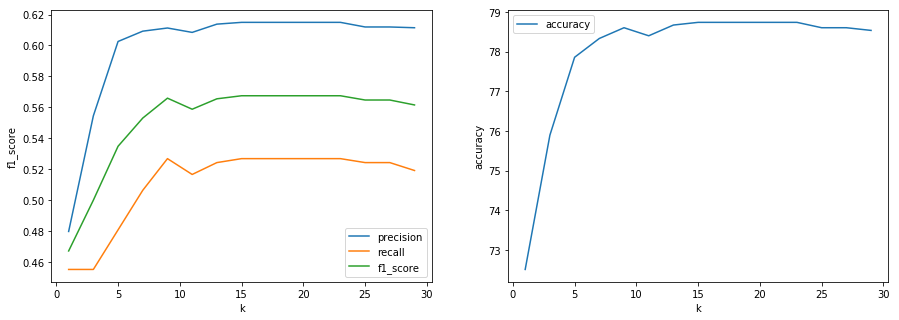

In [176]:
fig  = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.lineplot(x = 'k', y='precision', data = df11, label = 'precision', ax = ax1)
sns.lineplot(x = 'k', y='recall', data = df11, label = 'recall',  ax = ax1)
sns.lineplot(x = 'k', y='f1_score', data = df11, label = 'f1_score',ax = ax1)
sns.lineplot(x = 'k', y='accuracy', data = df11, label = 'accuracy', ax = ax2)

plt.show()

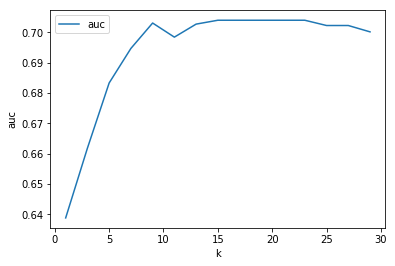

In [177]:
sns.lineplot(x = 'k', y='auc', data = df11, label = 'auc')

### Observation - 
For k=9, we get highest value of F1 Score. Therefore, using K = 9 to evaluate test data. 

In [179]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')

# fitting the model on crossvalidation train
knn.fit(X_1, y_1)

# predict the response on the crossvalidation train
pred = knn.predict(X_test)
    
prefor = precision_score(y_test, pred)
recfor = recall_score(y_test, pred)
    
# evaluate CV accuracy
f1_score_val = f1_score(y_test, pred) 

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
auc = metrics.auc(fpr, tpr)

print('For k=9, \n Precision : %f\n Recall : %f \n F1 Score : %f \n auc : %f ' % (prefor, recfor, f1_score_val, auc))

For k=9, 
 Precision : 0.585421
 Recall : 0.463063 
 F1 Score : 0.517103 
 auc : 0.673011 


#### Naive Bayes

In [180]:
from sklearn.naive_bayes import GaussianNB

In [181]:
gausian = GaussianNB()

# fitting the model on crossvalidation train
gausian.fit(X_tr, y_tr)

# predict the response on the crossvalidation train
pred = gausian.predict(X_cv)
    
prefor = precision_score(y_cv, pred)
recfor = recall_score(y_cv, pred)
    
# evaluate CV accuracy
f1_score_val = f1_score(y_cv, pred) 

fpr, tpr, thresholds = metrics.roc_curve(y_cv, pred)
auc = metrics.auc(fpr, tpr)

print('\n Precision : %f\n Recall : %f \n F1 Score : %f \n auc : %f ' % (prefor, recfor, f1_score_val, auc))


 Precision : 0.530499
 Recall : 0.734015 
 F1 Score : 0.615880 
 auc : 0.750065 


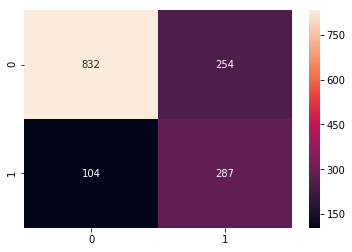

In [182]:
cm_2 = confusion_matrix(y_cv, pred)
sns.heatmap(cm_2,annot=True,fmt="d")